In [1]:
import pysm
from pysm.nominal import models

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

Map parameters                                                                                                                                             

In [2]:
nside = 512 #int(len(ells)/3)
lmax = 3*nside-1
ells = np.arange(lmax+1)

## Power law model 

#### Parameters
Gamma (convergence)

In [3]:
gamma_beta_sync = -2.5 
gamma_beta_dust = -3.5 

#### Calculate power spectrum (input)

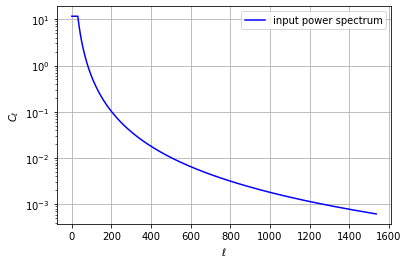

In [4]:
def powerlaw(ells, gamma):
    c_ells = ((ells+0.001) / 80.)**gamma
    c_ells[ells<30]=c_ells[30]
    return c_ells

cl_betaSync = powerlaw(ells, gamma_beta_sync)
cl_betaDust = powerlaw(ells, gamma_beta_dust)

plt.figure()
plt.semilogy(ells, cl_betaSync, 'b',label="input power spectrum")
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell$') #'$\ell(\ell+1) C_\ell/2\pi$'<br>
plt.legend()
plt.grid()
plt.show()

#### Map from power spectrum

In [5]:
def map_beta(ells, gamma, mean_add, sigma_des=0.1):
    cl_beta = powerlaw(ells, gamma)
    delta_map = hp.synfast(cl_beta, nside, new=True, verbose=False)
    sigma_map = np.std(delta_map)
    delta_beta = delta_map * sigma_des / sigma_map
    map_return = delta_beta+mean_add
    print(np.std(map_return), np.mean(map_return))
    return map_return

0.1 -3.001424389357185
0.09999999999999996 1.6016800802069022


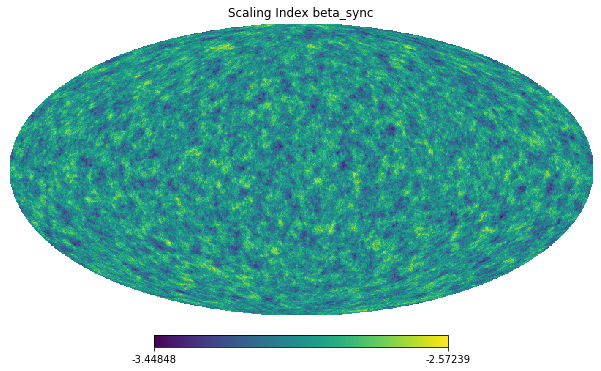

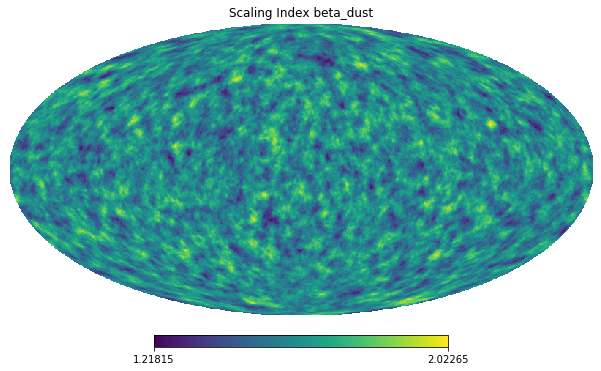

In [6]:
map_beta_sync = map_beta(ells, gamma_beta_sync, -3.)
map_beta_dust = map_beta(ells, gamma_beta_dust, 1.6)

hp.mollview(map_beta_sync, title='Scaling Index beta_sync') #unit='$\\beta$'
hp.mollview(map_beta_dust, title='Scaling Index beta_dust') #unit='$\\beta$'

plt.show()

In [7]:
map_beta_sync_fin = hp.synfast(cl_betaSync, nside, new=True, verbose=False) - map_beta_sync
map_beta_dust_fin = hp.synfast(cl_betaDust, nside, new=True, verbose=False) - map_beta_dust

#### Power spectrum from map (output)

In [8]:
cl_betaSync_out = hp.anafast(map_beta_sync_fin, lmax=lmax)

cl_betaDust_out = hp.anafast(map_beta_dust_fin, lmax=lmax)

#### Compare input and output power spectra

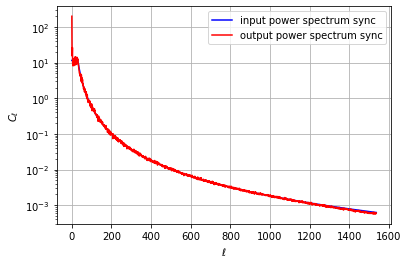

In [9]:
plt.figure()
plt.semilogy(ells, cl_betaSync, 'b',label="input power spectrum sync")
plt.semilogy(ells, cl_betaSync_out, 'r',label="output power spectrum sync")
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell$')
plt.legend()
plt.grid()
plt.show()

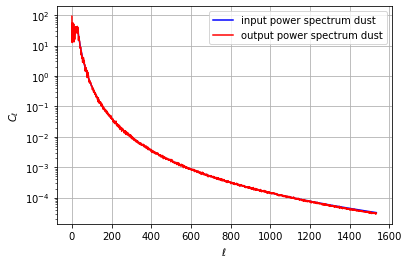

In [10]:
plt.figure()
plt.semilogy(ells, cl_betaDust, 'b',label="input power spectrum dust")
plt.semilogy(ells, cl_betaDust_out, 'r',label="output power spectrum dust")
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell$')
plt.legend()
plt.grid()
plt.show()